### Download USD and CAD LIBOR data for multiple tenors from FRED’s web site

In [53]:
library(quantmod)

getSymbols('CAD3MTD156N',src='FRED')
getSymbols('CAD1MTD156N',src='FRED')
getSymbols('CADONTD156N',src='FRED')
getSymbols('CAD12MD156N',src='FRED')
getSymbols('CAD6MTD156N',src='FRED')
getSymbols('CAD4MTD156N',src='FRED')
getSymbols('CAD1WKD156N',src='FRED')
getSymbols('CAD5MTD156N',src='FRED')
getSymbols('CAD8MTD156N',src='FRED')
getSymbols('CAD2MTD156N',src='FRED')
getSymbols('CAD9MTD156N',src='FRED')
getSymbols('CAD10MD156N',src='FRED')
getSymbols('CAD11MD156N',src='FRED')
getSymbols('CAD7MTD156N',src='FRED')
getSymbols('CAD2WKD156N',src='FRED')

[1] "CAD3MTD156N"

[1] "CAD1MTD156N"

[1] "CADONTD156N"

[1] "CAD12MD156N"

[1] "CAD6MTD156N"

[1] "CAD4MTD156N"

[1] "CAD1WKD156N"

[1] "CAD5MTD156N"

[1] "CAD8MTD156N"

[1] "CAD2MTD156N"

[1] "CAD9MTD156N"

[1] "CAD10MD156N"

[1] "CAD11MD156N"

[1] "CAD7MTD156N"

[1] "CAD2WKD156N"

In [54]:
ca_rates = cbind(CAD1MTD156N, CAD3MTD156N, CAD6MTD156N, CAD12MD156N)

In [55]:
summary(ca_rates)

     Index             CAD1MTD156N       CAD3MTD156N       CAD6MTD156N     
 Min.   :1990-05-01   Min.   : 0.2917   Min.   : 0.3983   Min.   : 0.6933  
 1st Qu.:1996-02-07   1st Qu.: 2.5467   1st Qu.: 2.6033   1st Qu.: 2.6725  
 Median :2001-11-14   Median : 4.0469   Median : 4.1094   Median : 4.2344  
 Mean   :2001-11-15   Mean   : 4.1104   Mean   : 4.1984   Mean   : 4.3202  
 3rd Qu.:2007-08-23   3rd Qu.: 5.1875   3rd Qu.: 5.2792   3rd Qu.: 5.4223  
 Max.   :2013-05-31   Max.   :13.9375   Max.   :13.8750   Max.   :13.6875  
                      NA's   :3         NA's   :3         NA's   :3        
  CAD12MD156N    
 Min.   : 1.187  
 1st Qu.: 2.826  
 Median : 4.323  
 Mean   : 4.566  
 3rd Qu.: 5.718  
 Max.   :13.812  
 NA's   :3       

In [56]:
head(ca_rates)

           CAD1MTD156N CAD3MTD156N CAD6MTD156N CAD12MD156N
1990-05-01     13.1875    13.43750    13.50000     13.7500
1990-05-02     13.2500    13.48438    13.53125     13.7500
1990-05-03     13.3125    13.50000    13.56250     13.8125
1990-05-04     13.3125    13.43750    13.56250     13.7500
1990-05-08     13.2500    13.42188    13.42188     13.5000
1990-05-09     13.3750    13.43750    13.37500     13.3750

In [57]:
ca_rates_com=na.approx(ca_rates) 
head(ca_rates_com)

           CAD1MTD156N CAD3MTD156N CAD6MTD156N CAD12MD156N
1990-05-01     13.1875    13.43750    13.50000     13.7500
1990-05-02     13.2500    13.48438    13.53125     13.7500
1990-05-03     13.3125    13.50000    13.56250     13.8125
1990-05-04     13.3125    13.43750    13.56250     13.7500
1990-05-08     13.2500    13.42188    13.42188     13.5000
1990-05-09     13.3750    13.43750    13.37500     13.3750

In [58]:
summary(ca_rates_com)

     Index             CAD1MTD156N       CAD3MTD156N       CAD6MTD156N     
 Min.   :1990-05-01   Min.   : 0.2917   Min.   : 0.3983   Min.   : 0.6933  
 1st Qu.:1996-02-07   1st Qu.: 2.5387   1st Qu.: 2.6017   1st Qu.: 2.6704  
 Median :2001-11-14   Median : 4.0469   Median : 4.1094   Median : 4.2325  
 Mean   :2001-11-15   Mean   : 4.1089   Mean   : 4.1969   Mean   : 4.3187  
 3rd Qu.:2007-08-23   3rd Qu.: 5.1875   3rd Qu.: 5.2783   3rd Qu.: 5.4219  
 Max.   :2013-05-31   Max.   :13.9375   Max.   :13.8750   Max.   :13.6875  
  CAD12MD156N    
 Min.   : 1.187  
 1st Qu.: 2.825  
 Median : 4.322  
 Mean   : 4.565  
 3rd Qu.: 5.717  
 Max.   :13.812  

### Check data for gaps, sudden jumps and other data quality issues

In [59]:
#install.packages('ggfortify', dependencies=TRUE, repos='http://cran.rstudio.com/')
library(ggplot2)
library(ggfortify)
library(magrittr)

In [61]:
library(repr)

options(repr.plot.width=9,
        repr.plot.height=5)

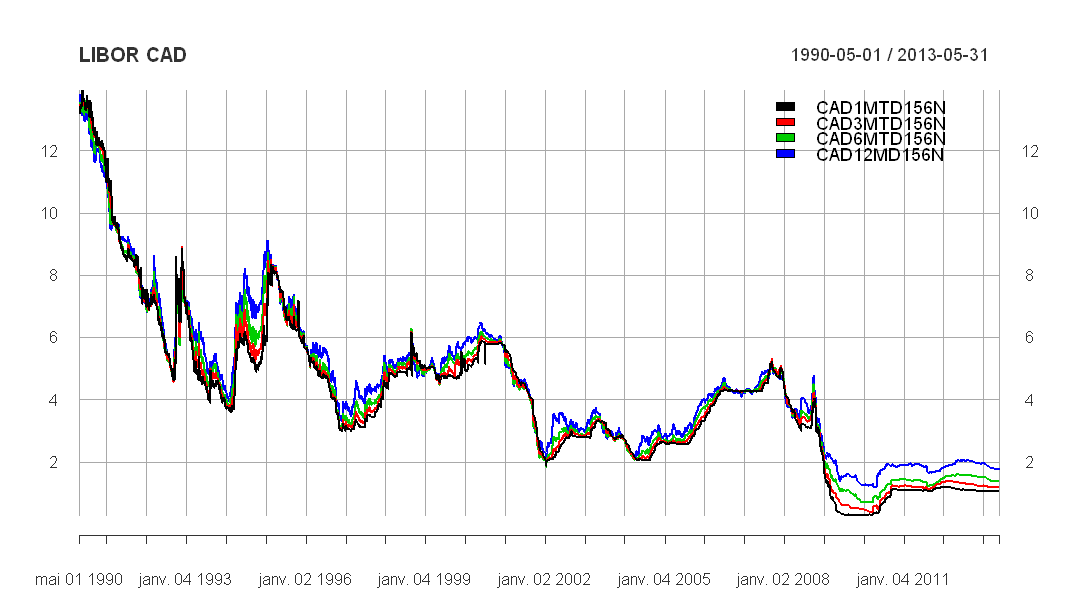

In [62]:
# graphique des us_rates créé par xts::plot.xts
xts::plot.xts(
  ca_rates_com,
  ylab = "Interest rates",
  main = "LIBOR CAD",  
  screens = factor(1, 1), 
  legend.loc = "topright", auto.legend=TRUE)

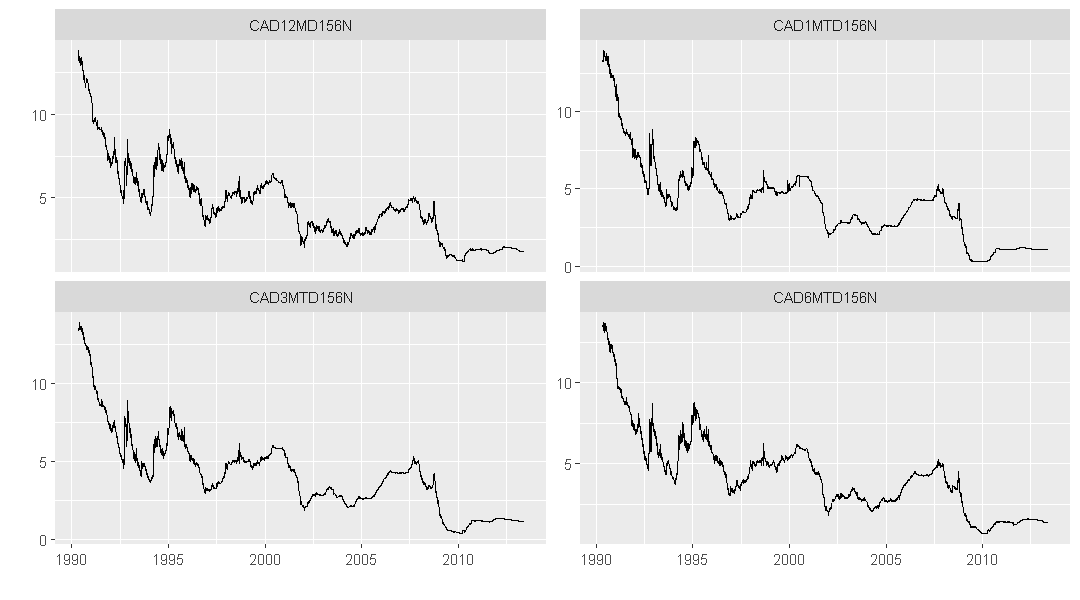

In [63]:
# us_rates by autoplot
autoplot(ca_rates_com, nrow=4,ncol=2)

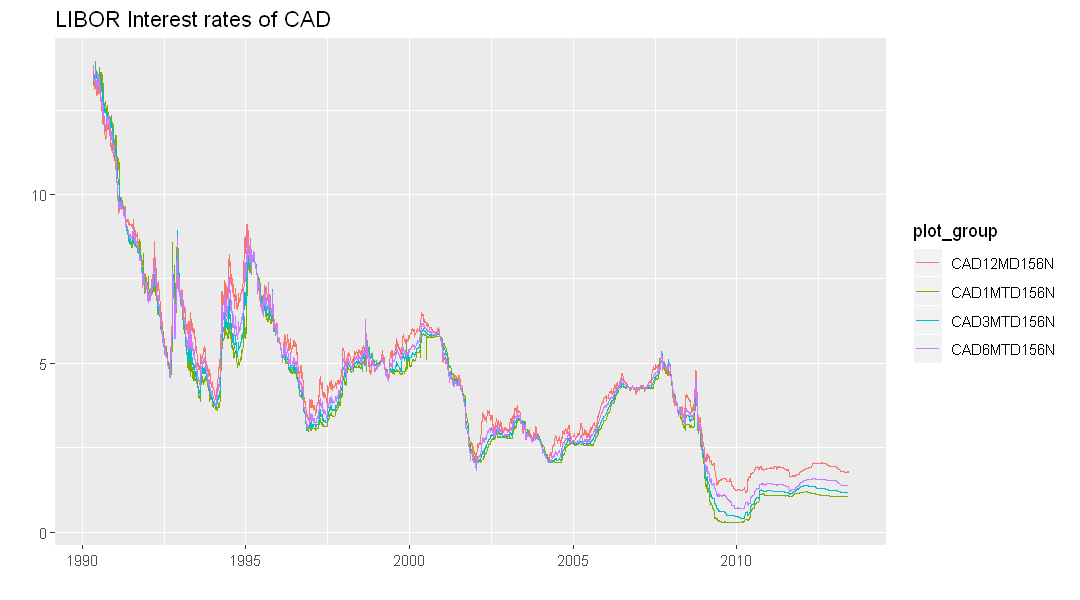

In [64]:
autoplot(ca_rates_com, main='LIBOR Interest rates of CAD',facets = FALSE)

### Plot time series of IRs and their 1-day and 30-day increments using either xtspackage

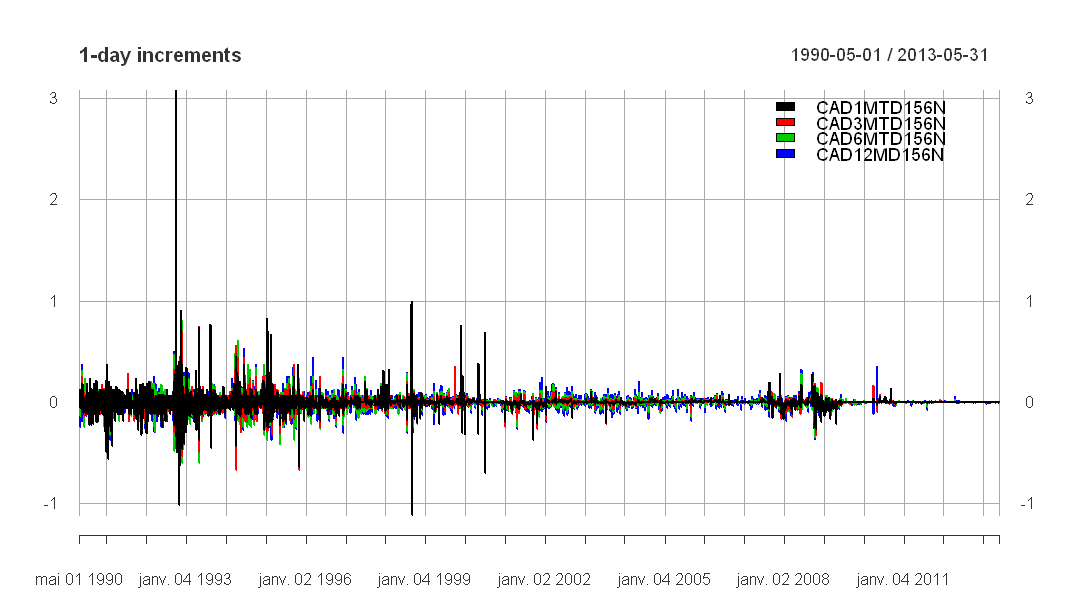

In [65]:
# for 4 tenors
ca_libors1=diff(ca_rates_com)
plot(ca_libors1, main='1-day increments',legend.loc = "topright", auto.legend=TRUE)

In [66]:
head(ca_libors1)

           CAD1MTD156N CAD3MTD156N CAD6MTD156N CAD12MD156N
1990-05-01          NA          NA          NA          NA
1990-05-02      0.0625     0.04688     0.03125      0.0000
1990-05-03      0.0625     0.01562     0.03125      0.0625
1990-05-04      0.0000    -0.06250     0.00000     -0.0625
1990-05-08     -0.0625    -0.01562    -0.14062     -0.2500
1990-05-09      0.1250     0.01562    -0.04688     -0.1250

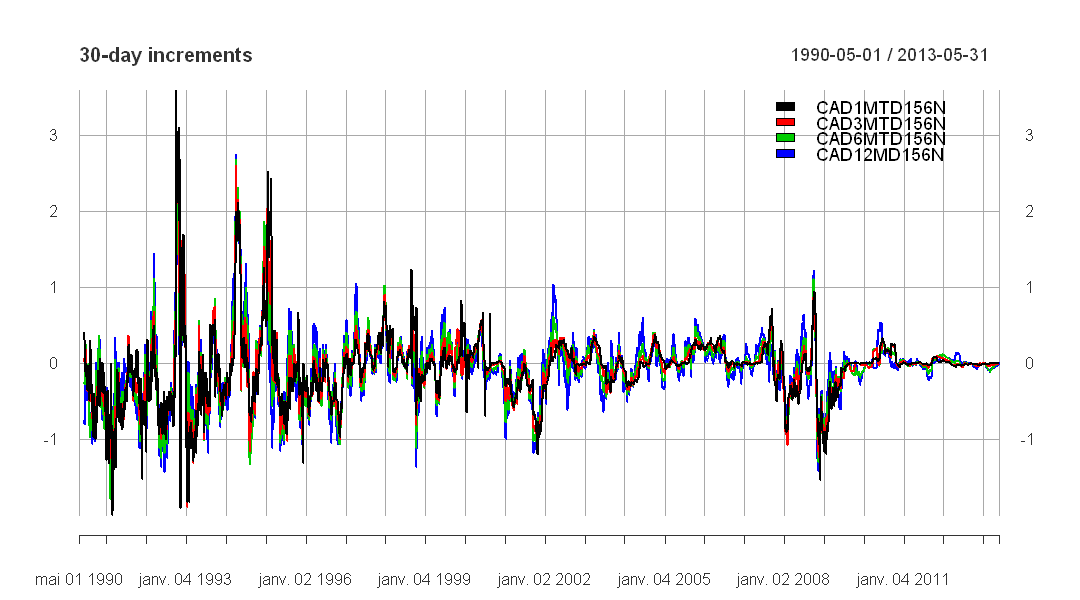

In [67]:
# for 4 tenors
ca_libors30=diff(ca_rates_com, lag=30,differences=1)
plot(ca_libors30, main='30-day increments',legend.loc = "topright", auto.legend=TRUE)

In [68]:
head(na.omit(ca_libors30))

           CAD1MTD156N CAD3MTD156N CAD6MTD156N CAD12MD156N
1990-06-14     0.40625     0.06250    -0.25000    -0.75000
1990-06-15     0.31250     0.01562    -0.28125    -0.79687
1990-06-18     0.25000     0.00000    -0.23437    -0.75000
1990-06-19     0.21875     0.12500     0.00000    -0.50000
1990-06-20     0.17188     0.14062     0.20312    -0.18750
1990-06-21    -0.04687     0.12500     0.18750    -0.06250

In [69]:
v=diff(CAD1MTD156N)
l=na.omit(v)

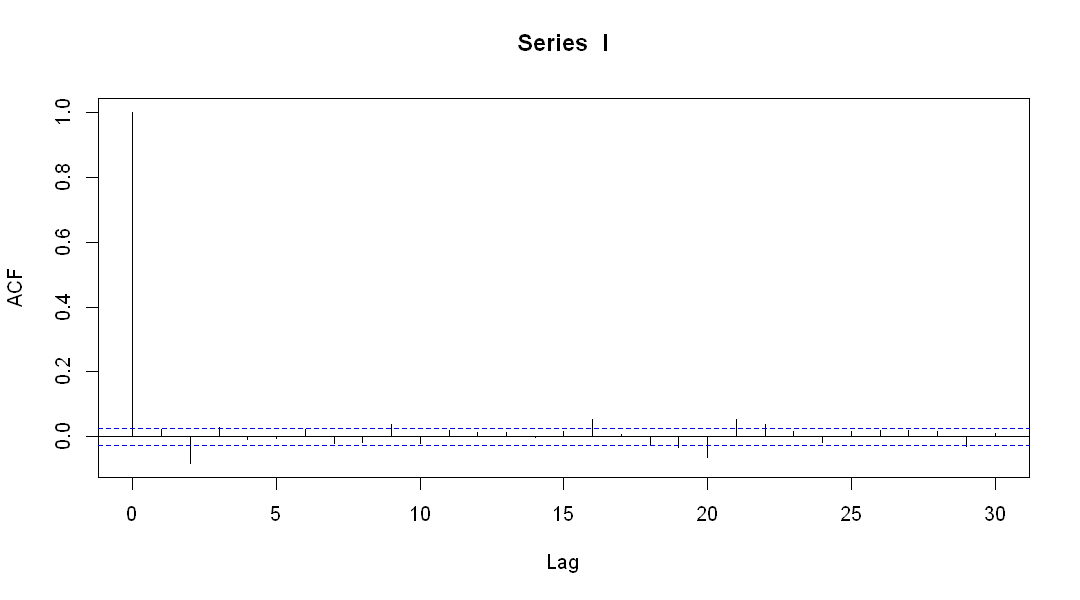

In [70]:
acf(l, lag.max=30)

### Plot histogram of IRs and their 1-day and 30-day increments,  and compare it to several distribution fits

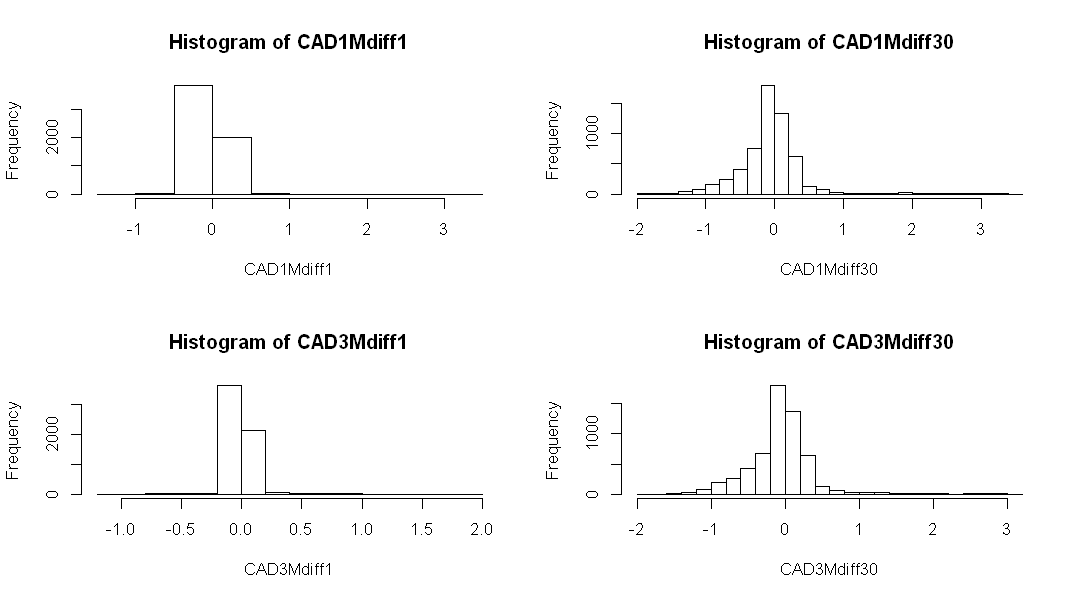

In [71]:
# For 1-month tenor
CAD1Mdiff1 = diff(CAD1MTD156N)
par(mfrow=c(2,2))
hist(CAD1Mdiff1)
CAD1Mdiff30=diff(CAD1MTD156N, lag=30, differences=1)
hist(CAD1Mdiff30, breaks=20)

# For 3-months tenor
CAD3Mdiff1 = diff(CAD3MTD156N)
hist(CAD3Mdiff1)
CAD3Mdiff30=diff(CAD3MTD156N, lag=30, differences=1)
hist(CAD3Mdiff30, breaks=20)

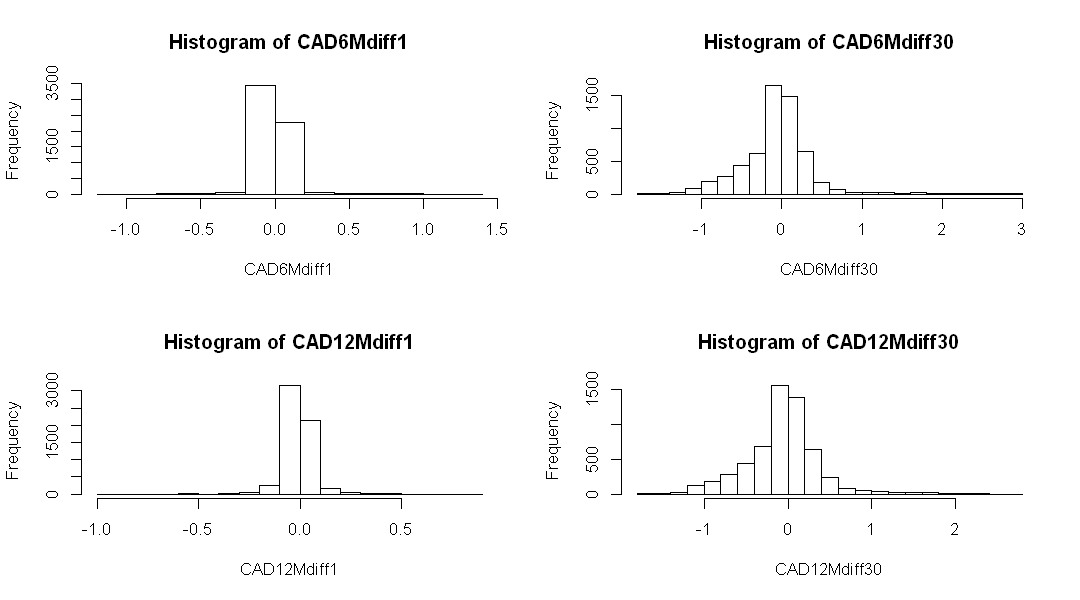

In [72]:
# For 6-months tenor
CAD6Mdiff1 = diff(CAD6MTD156N)
par(mfrow=c(2,2))
hist(CAD6Mdiff1)
CAD6Mdiff30=diff(CAD6MTD156N, lag=30, differences=1)
hist(CAD6Mdiff30, breaks=20)

# For 12-months tenor
CAD12Mdiff1 = diff(CAD12MD156N)
hist(CAD12Mdiff1)
CAD12Mdiff30=diff(CAD12MD156N, lag=30, differences=1)
hist(CAD12Mdiff30, breaks=20)

In [73]:
library(fitdistrplus)
ca=fortify(CAD1MTD156N)
head(ca)

Index,CAD1MTD156N
1990-05-01,13.1875
1990-05-02,13.2500
1990-05-03,13.3125
1990-05-04,13.3125
1990-05-08,13.2500
1990-05-09,13.3750


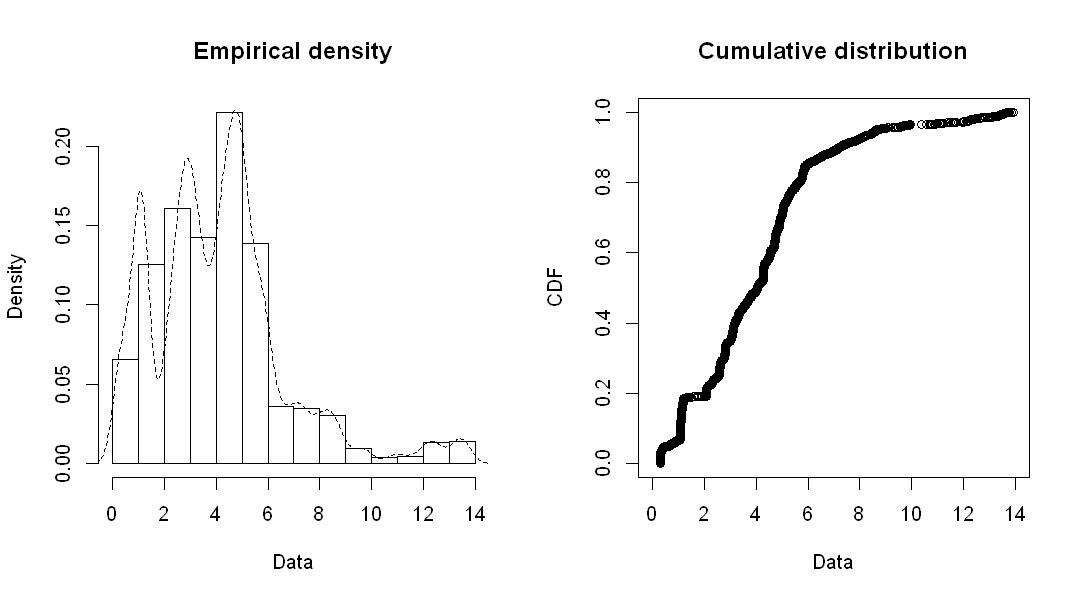

In [74]:
ca1m = na.omit(ca) 
plotdist(ca1m$CAD1MTD156N, histo = TRUE, demp = TRUE)

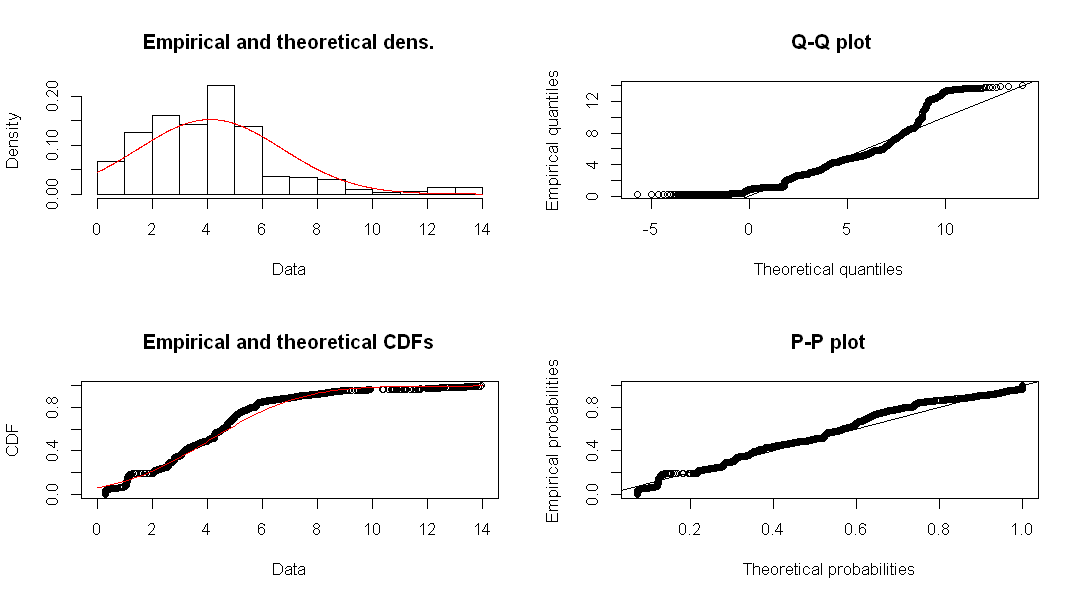

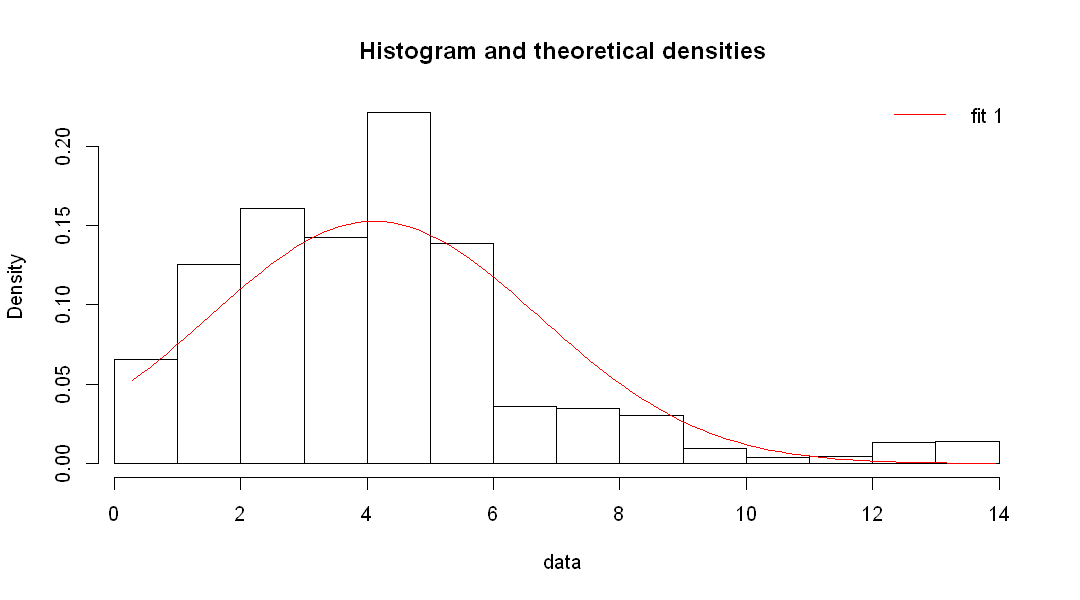

In [75]:
f=fitdist(ca1m$CAD1MTD156N,distr="norm")
plot(f)
denscomp(f) 
# doesn't work with breaks

summary statistics
------
min:  -1.07812   max:  1.9375 
median:  0 
mean:  -0.002103466 
estimated sd:  0.07137432 
estimated skewness:  4.060983 
estimated kurtosis:  136.1363 

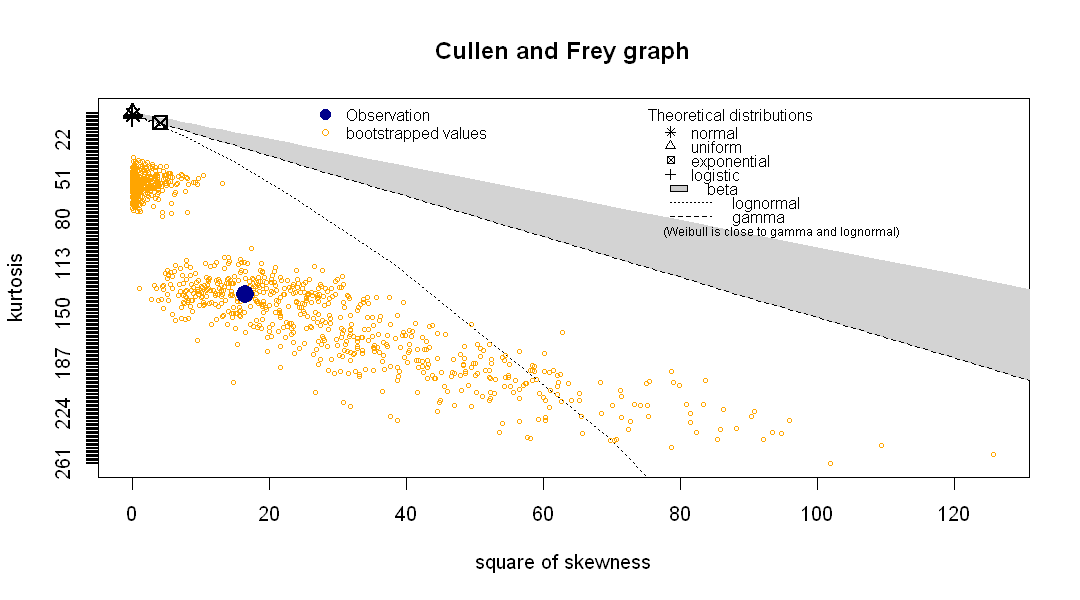

In [76]:
descdist(as.numeric(na.omit(CAD3Mdiff1)), boot=1000)
# the other distributions don't work because the values have to be positive

### Calculate and plot average term structure of IR and its standard deviation

In [77]:
ca_rates_df=fortify(ca_rates_com)
colnames(ca_rates_df) <- c("Date","Tenor 1M","Tenor 3M","Tenor 6M","Tenor 12M")

In [78]:
nums <- unlist(lapply(ca_rates_df, is.numeric))
head(ca_rates_df[,nums])
b=ca_rates_df[,nums]

Tenor 1M,Tenor 3M,Tenor 6M,Tenor 12M
13.1875,13.43750,13.50000,13.7500
13.2500,13.48438,13.53125,13.7500
13.3125,13.50000,13.56250,13.8125
13.3125,13.43750,13.56250,13.7500
13.2500,13.42188,13.42188,13.5000
13.3750,13.43750,13.37500,13.3750


In [79]:
mean(ca_rates_com)

[1] 4.29727

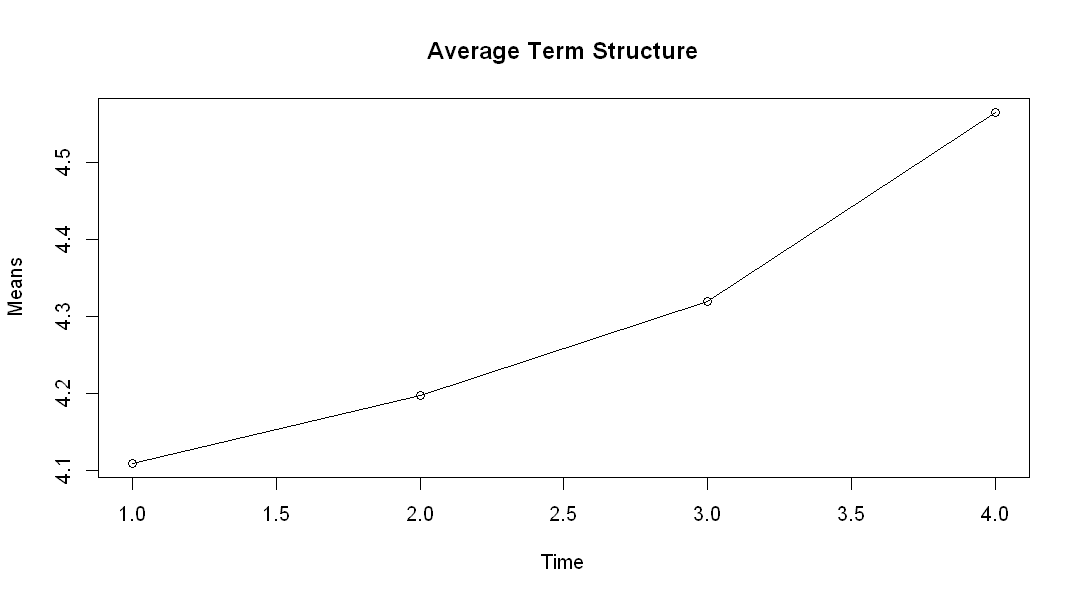

In [80]:
means_ca_rates = colMeans(ca_rates_df[,nums])
plot(means_ca_rates, type='o',main='Average Term Structure', xlab='Time',ylab='Means')

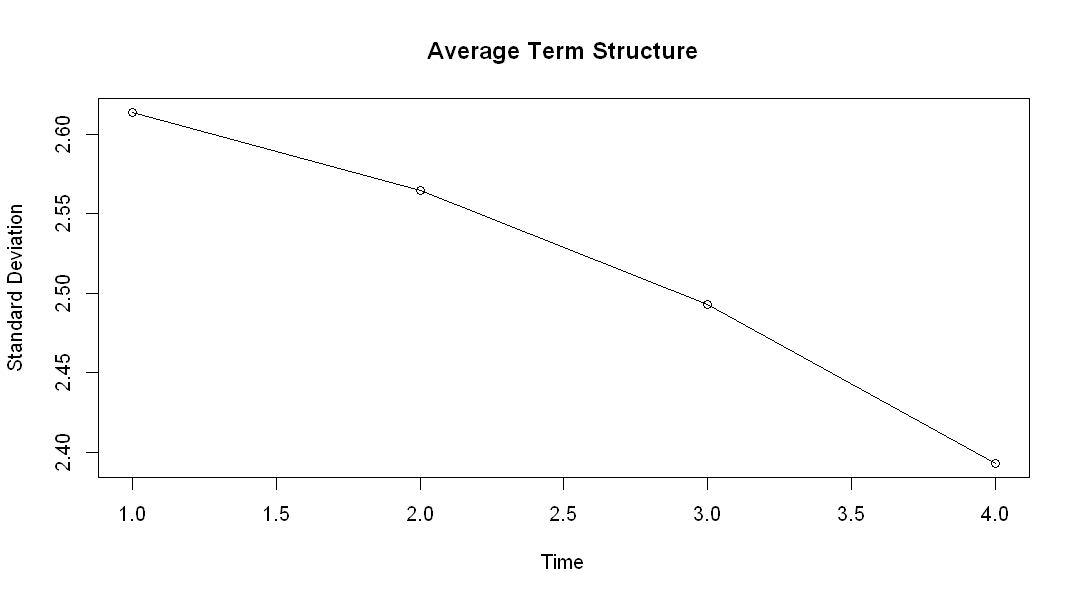

In [81]:
sd_ca_rates=apply(ca_rates_df[,nums], 2, sd)
plot(sd_ca_rates, type='o',main='Average Term Structure', xlab='Time',ylab='Standard Deviation')

### Plot correlation matrix using corrplotpackage for correlation of the increments between various tenors

In [82]:
#install.packages("corrplot")

In [83]:
w=na.omit(ca_libors1)

In [84]:
m=cor(w)
m

,CAD1MTD156N,CAD3MTD156N,CAD6MTD156N,CAD12MD156N
CAD1MTD156N,1.0000000,0.8295203,0.6989599,0.5906947
CAD3MTD156N,0.8295203,1.0000000,0.8884547,0.7995403
CAD6MTD156N,0.6989599,0.8884547,1.0000000,0.9064709
CAD12MD156N,0.5906947,0.7995403,0.9064709,1.0000000


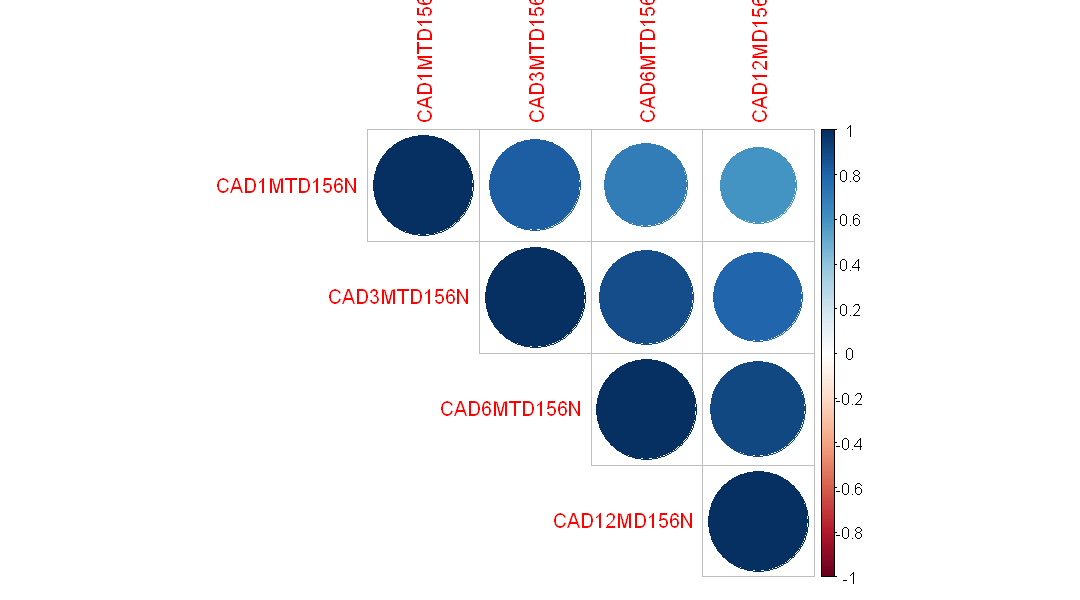

In [85]:
library(corrplot)
corrplot(m, type='upper')

In [86]:
q=na.omit(ca_libors30)

In [87]:
p=cor(q, use='pairwise.complete.obs',method='pearson')
p

,CAD1MTD156N,CAD3MTD156N,CAD6MTD156N,CAD12MD156N
CAD1MTD156N,1.0000000,0.9455222,0.8480168,0.7135492
CAD3MTD156N,0.9455222,1.0000000,0.9593020,0.8608737
CAD6MTD156N,0.8480168,0.9593020,1.0000000,0.9545256
CAD12MD156N,0.7135492,0.8608737,0.9545256,1.0000000


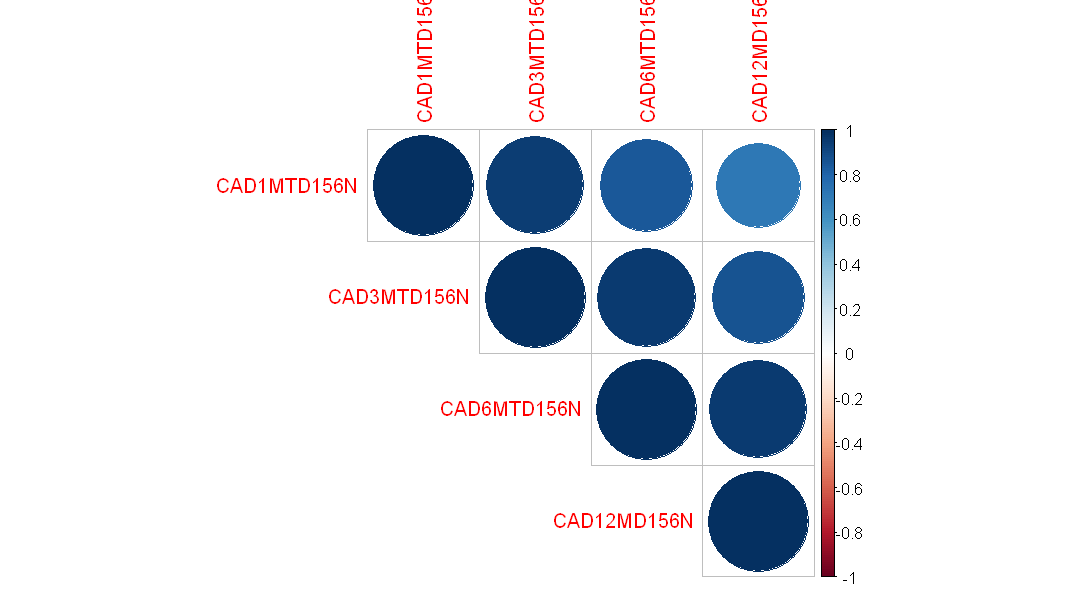

In [88]:
library(corrplot)
corrplot(p, type='upper')

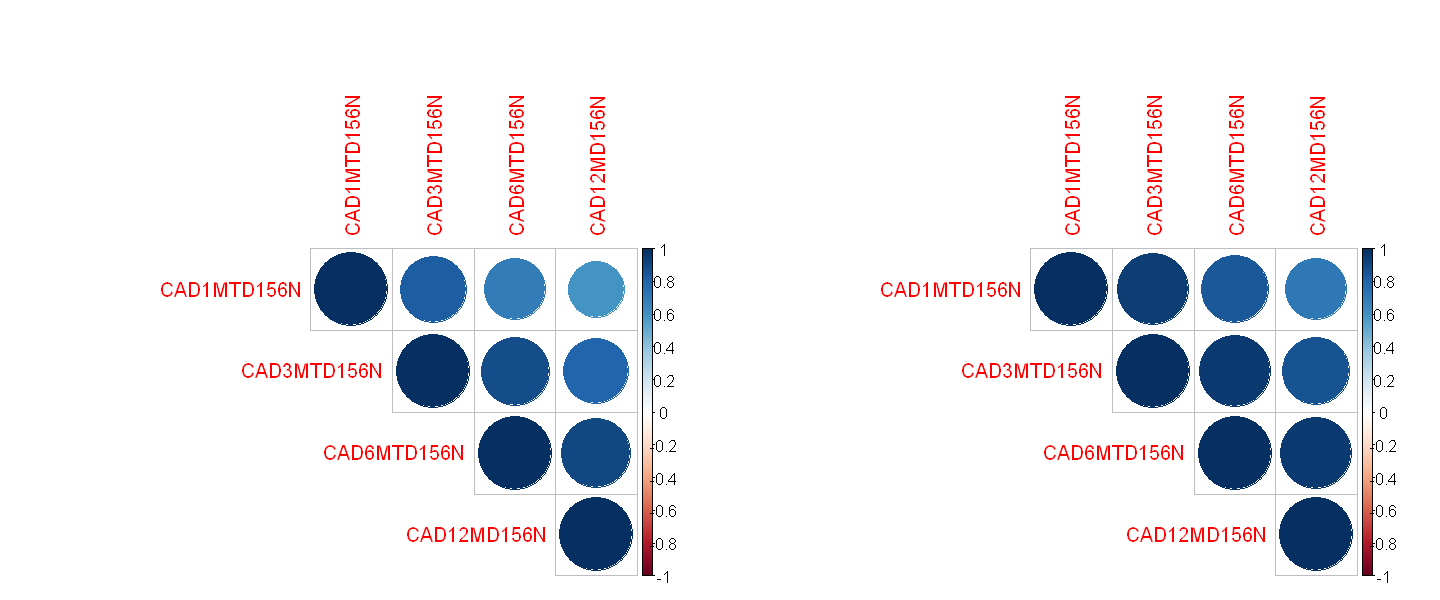

In [89]:
library(repr)

options(repr.plot.width=12,
        repr.plot.height=5)
par(mfrow=c(1,2))
corrplot(m, type='upper')
corrplot(p, type='upper')

### Calculate and plot three first principal components of IR. How much total variance do they explain?

In [90]:
ca_libors_pca <-prcomp(w,center = TRUE,scale. = TRUE)
summary(ca_libors_pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.8344 0.6781 0.32960 0.25761
Proportion of Variance 0.8413 0.1150 0.02716 0.01659
Cumulative Proportion  0.8413 0.9563 0.98341 1.00000

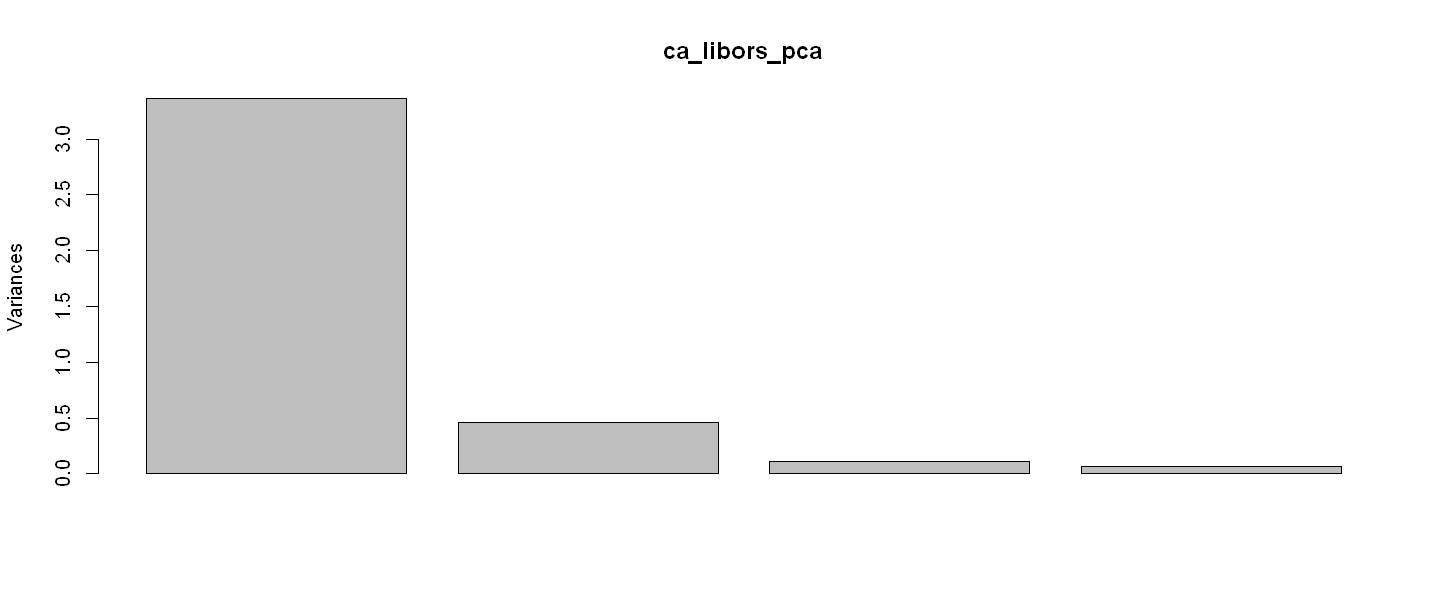

In [91]:
plot(ca_libors_pca)

In [92]:
library("FactoMineR")
ca.pca <- PCA(w, graph = FALSE)
ca.pca

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 5833 individuals, described by 4 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error 

In [93]:
library("factoextra")
eig.val <- get_eigenvalue(ca.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.3651230,84.128076,84.12808
Dim.2,0.4598828,11.497070,95.62515
Dim.3,0.1086332,2.715829,98.34097
Dim.4,0.0663610,1.659025,100.00000


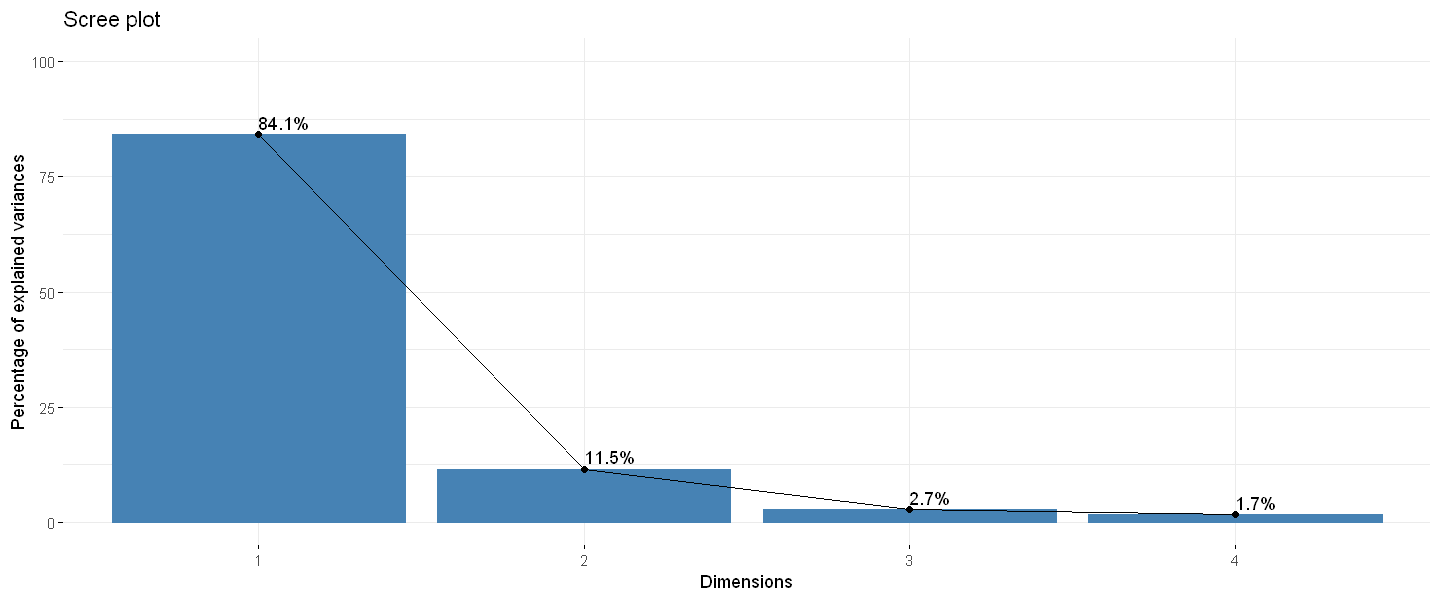

In [94]:
fviz_eig(ca.pca, addlabels = TRUE, ylim = c(0, 100))

In [95]:
ca.pca30 <- PCA(q, graph = FALSE)

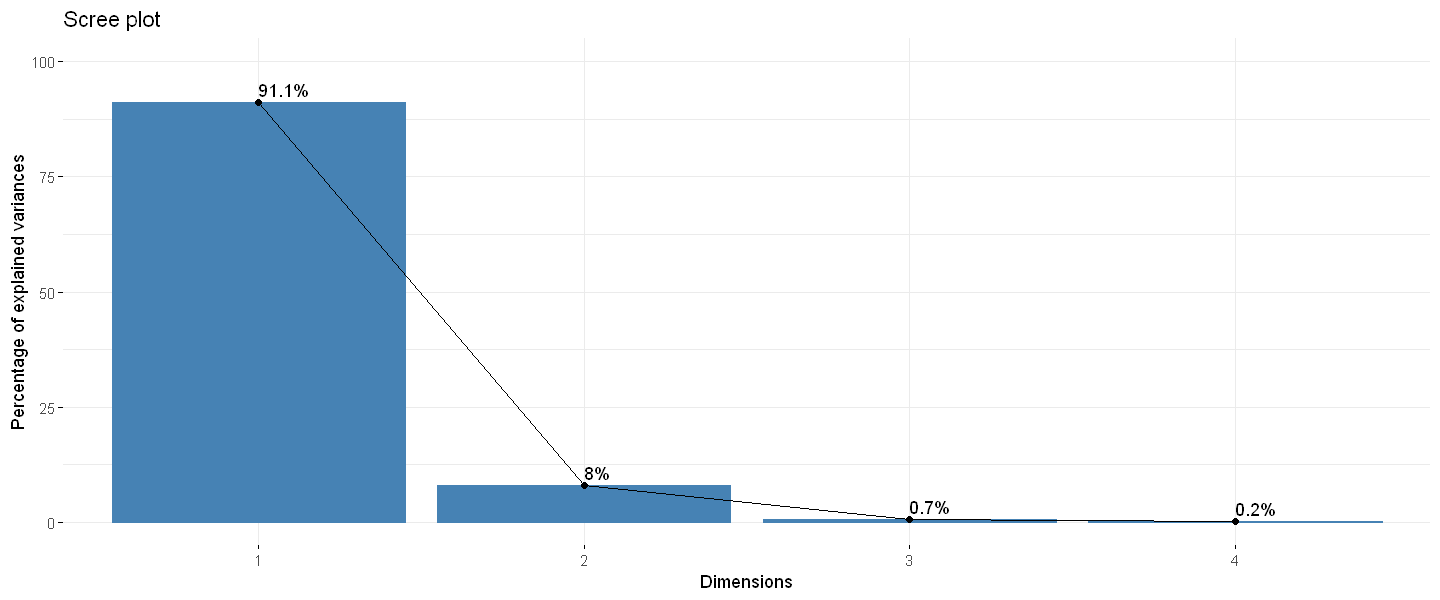

In [96]:
fviz_eig(ca.pca30, addlabels = TRUE, ylim = c(0, 100))

### Estimate the scaling factor between the 1-day and 30-day increments. How does it depend on the estimation time period?

In [97]:
ca_libors_diff=cbind(ca_libors1,ca_libors30)
ca_libors_diff

           CAD1MTD156N CAD3MTD156N CAD6MTD156N CAD12MD156N CAD1MTD156N.1
1990-05-01          NA          NA          NA          NA            NA
1990-05-02     0.06250     0.04688     0.03125     0.00000            NA
1990-05-03     0.06250     0.01562     0.03125     0.06250            NA
1990-05-04     0.00000    -0.06250     0.00000    -0.06250            NA
1990-05-08    -0.06250    -0.01562    -0.14062    -0.25000            NA
1990-05-09     0.12500     0.01562    -0.04688    -0.12500            NA
1990-05-10     0.06250     0.00000     0.06250     0.06250            NA
1990-05-11    -0.06250    -0.06250    -0.06250    -0.18750            NA
1990-05-14     0.06250     0.05250     0.03125     0.06250            NA
1990-05-15     0.04688     0.01000    -0.01562     0.03125            NA
1990-05-16     0.01562     0.01563    -0.01563    -0.03125            NA
1990-05-17     0.00000     0.04687     0.00000     0.00000            NA
1990-05-18     0.00000     0.00000     0.00000     

In [98]:
sd(na.omit(ca_libors30[,1]))/sd(na.omit(ca_libors1[,1]))
sd(na.omit(ca_libors30[,2]))/sd(na.omit(ca_libors1[,2]))
sd(na.omit(ca_libors30[,3]))/sd(na.omit(ca_libors1[,3]))
sd(na.omit(ca_libors30[,4]))/sd(na.omit(ca_libors1[,4]))

[1] 5.546364

[1] 6.066918

[1] 6.057543

[1] 6.291645

In [99]:
vasicek <- function(alpha, beta, sigma, n, r0){
v <- rep(0, n)
v[1] <- r0
for (i in 2:n){
v[i] <- v[i - 1] + alpha * (beta - v[i - 1]) + sigma * rnorm(1)
}
return(v)
}

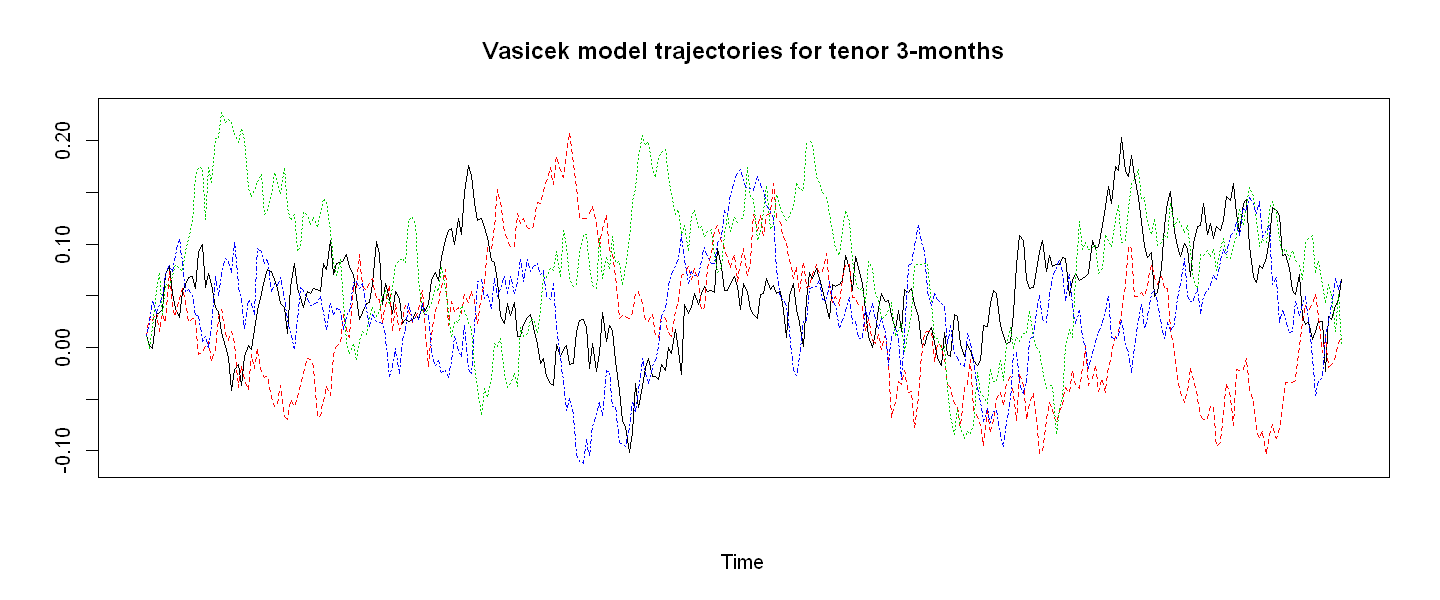

In [100]:
set.seed(123)
r <- replicate(4, vasicek(0.04, 0.041, 0.02,365,tail(CAD3MTD156N,n=1)/100))
matplot(r, type = "l", ylab = "", xlab = "Time", xaxt = "no", main =
"Vasicek model trajectories for tenor 3-months")

### Fit Vasicek model to each tenor using sde package

In [101]:
library('sde')

In [102]:
x = CAD1MTD156N
theta=c(1,10,1000)
p=0.05
dsOU(x, theta, log = FALSE)
#psOU(x, theta, lower.tail = TRUE, log.p = FALSE)
#qsOU(p, theta, lower.tail = TRUE, log.p = FALSE)
#rsOU(n=1, theta)

           CAD1MTD156N
1990-05-01 0.001781071
1990-05-02 0.001781042
1990-05-03 0.001781012
1990-05-04 0.001781012
1990-05-08 0.001781042
1990-05-09 0.001780983
1990-05-10 0.001780953
1990-05-11 0.001780983
1990-05-14 0.001780953
1990-05-15 0.001780931
1990-05-16 0.001780923
1990-05-17 0.001780923
1990-05-18 0.001780923
1990-05-21 0.001780923
1990-05-22 0.001780953
1990-05-23 0.001780863
1990-05-24 0.001780803
1990-05-25 0.001780711
1990-05-29 0.001780719
1990-05-30 0.001780757
1990-05-31 0.001780811
1990-06-01 0.001780848
1990-06-04 0.001780863
1990-06-05 0.001780863
1990-06-06 0.001780863
1990-06-07 0.001780841
1990-06-08 0.001780833
1990-06-11 0.001780863
1990-06-12 0.001780863
1990-06-13 0.001780879
1990-06-14 0.001780879
1990-06-15 0.001780894
1990-06-18 0.001780894
1990-06-19 0.001780908
1990-06-20 0.001780961
1990-06-21 0.001781005
1990-06-22 0.001781012
1990-06-25 0.001780983
1990-06-26 0.001780975
1990-06-27 0.001780953
1990-06-28 0.001780953
1990-06-29 0.001780983
1990-07-02 

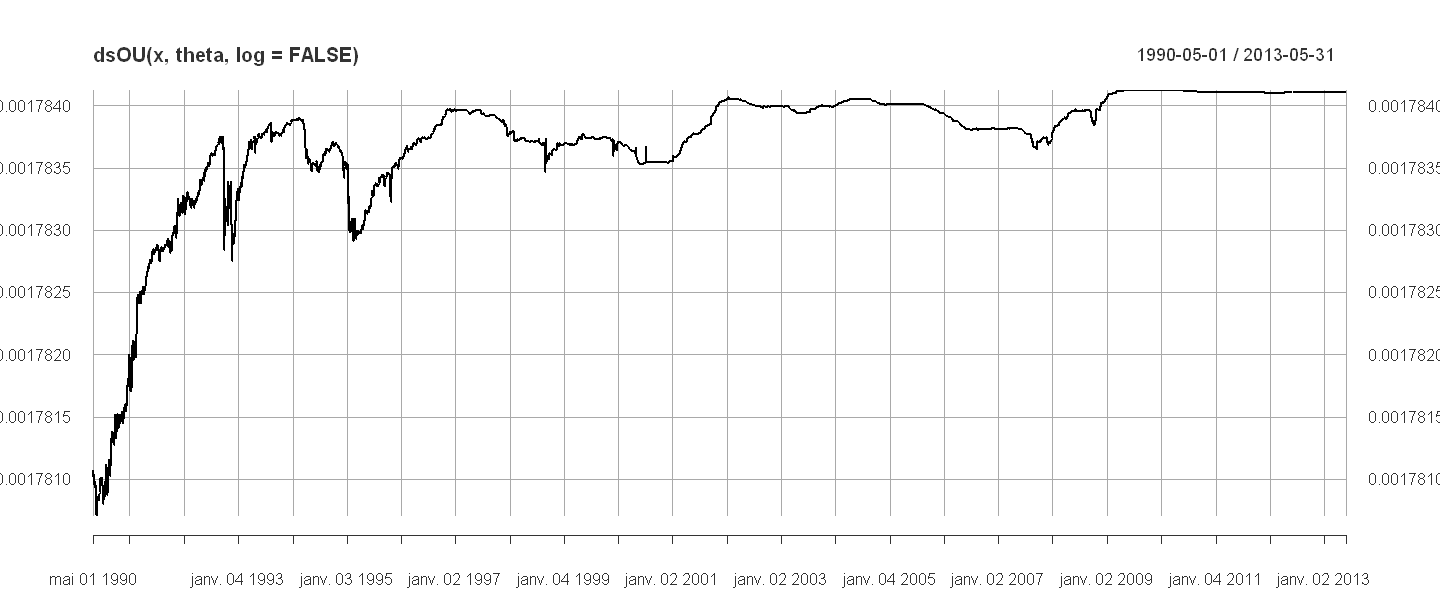

In [103]:
plot(dsOU(x, theta, log = FALSE))

In [104]:
set.seed(123)
d <- expression(-5 * USD1MTD156N)
s <- expression(3.5)
sde.sim(X0=10,drift=d, sigma=s)-> X
plot(X,main="VAS")

sigma.x not provided, attempting symbolic derivation.



ERROR: Error in eval(drift): objet 'USD1MTD156N' introuvable


In [ ]:
plot(sde.sim(model ="VAS", theta = c (3 ,2 ,1)))

### Join the fitted Vasicekmodels by using correlated Brownian motions simulated using the first three principal components

In [ ]:
install.packages('onlinePCA')

In [ ]:
library('onlinePCA')

In [ ]:
## Simulate Brownian Motion
n <- 100 # number of sample paths
d <- 50 # number of observation points
x <- matrix(rnorm(n*d,sd=1/sqrt(d)),n,d)
x <- t(apply(x,1,cumsum)) # dim(x) = c(100,50)
q <- 10 # number of PC to compute
B <- 20 # block size


In [ ]:
## Simulate Brownian Motion(another way)
t <- 0:100  # time
sig2 <- 0.01
## first, simulate a set of random deviates
x <- rnorm(n = length(t) - 1, sd = sqrt(sig2))
## now compute their cumulative sum
x <- c(0, cumsum(x))
plot(t, x, type = "l", ylim = c(-2, 2))

### Enhance the model by replacing constant volatility assumption by a stochastic volatility model

In [ ]:
install.packages('stochvol')

In [ ]:
library(stochvol)

In [ ]:
## Simulate a short and highly persistent SV process
sim <- svsim(100, mu = -10, phi = 0.99, sigma = 0.2)
## Obtain 5000 draws from the sampler (that's not a lot)
draws <- svsample(sim$y, draws = 5000, burnin = 100,
priormu = c(-10, 1), priorphi = c(20, 1.5),
priorsigma = 0.2)
## Plot the latent volatilities and some forecasts
volplot(draws, forecast = 10)
## Re-plot with different quantiles
newquants <- c(0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99)
draws <- updatesummary(draws, quantiles=newquants)
volplot(draws, forecast = 10)